In [1]:
%matplotlib notebook
from ipywidgets import interact_manual, Dropdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import re

In [3]:
%%bash
ls

NetworkTraffic.ipynb
README.md
network_data.log
network_monitor.py
ping_list.json
plots
runs


In [5]:
data = []
with open("./network_data.log", 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [6]:
traffic = pd.DataFrame(data)

In [7]:
traffic.sample(10)

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url,utc_datetime
198,None,None,46454,200,True,0.248723,1511380993,http://www.apple.com,2017-11-22 20:03:13.152945
32,None,None,11044,200,True,0.166820,1511380927,http://www.google.com,2017-11-22 20:02:07.149186
88,None,None,11159,200,True,0.181558,1511380951,http://www.google.com,2017-11-22 20:02:31.594900
24,None,None,11093,200,True,0.200694,1511380923,http://www.google.com,2017-11-22 20:02:03.427975
120,None,None,11130,200,True,0.228438,1511380966,http://www.google.com,2017-11-22 20:02:46.155077
62,None,None,46454,200,True,0.547361,1511380940,http://www.apple.com,2017-11-22 20:02:20.409722
158,None,None,46454,200,True,0.259106,1511380979,http://www.apple.com,2017-11-22 20:02:59.197869
122,None,None,46454,200,True,0.392667,1511380966,http://www.apple.com,2017-11-22 20:02:46.497632
98,None,None,46454,200,True,0.270513,1511380955,http://www.apple.com,2017-11-22 20:02:35.298072
223,None,None,157828,200,True,0.445052,1511381001,http://www.microsoft.com,2017-11-22 20:03:21.045674


In [8]:
traffic.shape

(256, 9)

In [9]:
traffic.groupby(['url']).count()

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,utc_datetime
url,,,,,,,,
http://www.apple.com,0,0,64,64,64,64,64,64
http://www.facebook.com,0,0,64,64,64,64,64,64
http://www.google.com,0,0,64,64,64,64,64,64
http://www.microsoft.com,0,0,64,64,64,64,64,64


In [10]:
url_picker = Dropdown(
    options=['all']+list(traffic.url.unique()),
    value=(['all']+list(traffic.url.unique()))[0],
    description='URL',
    disabled=False,
)

def draw_traffic(url):
    fig, ax = plt.subplots(figsize=(8,6))
    if url == 'all':
        plt.title('All traffic')
        traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
    else:
        plt.title(traffic[traffic['url']==url]['url'].unique()[0])
        traffic[traffic['url']==url].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
        
    matches = re.match("https?:\/\/(www)?\.(.+)\.(.+)",url)
    if url == 'all':
        fig.savefig('./plots/all_traffic.png')
    else:
        fig.savefig('./plots/{}_traffic.png'.format(matches.group(1)))
interact_manual(draw_traffic, url=url_picker);#

<IPython.core.display.Javascript object>


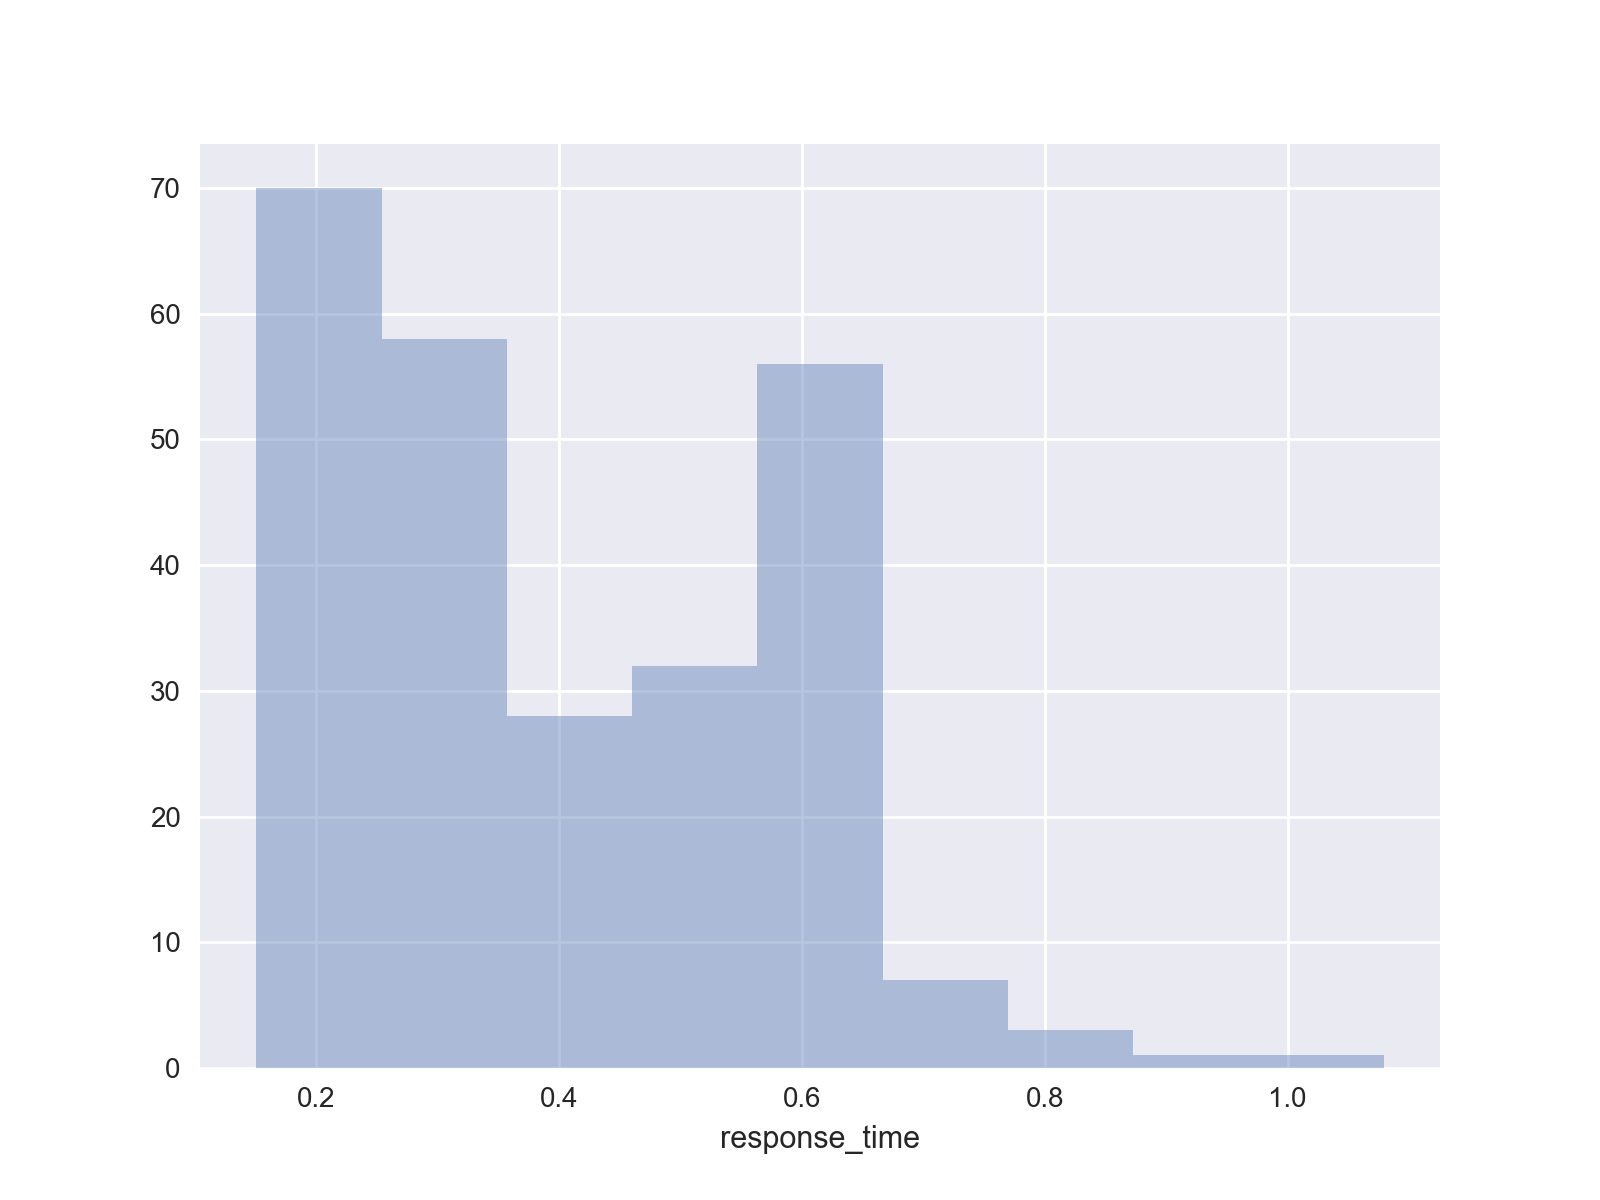

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
plt_data = traffic[
    (traffic['url'] != 'https://gsep.daimler.com/confluence' ) &
    (traffic['url'] != 'https://gsep.daimler.com/stash')]
sns.distplot(plt_data.response_time, ax=ax, kde=False)
fig.savefig('./plots/response_time.png')

In [12]:
traffic['response_code'].unique()

array([200])

<IPython.core.display.Javascript object>


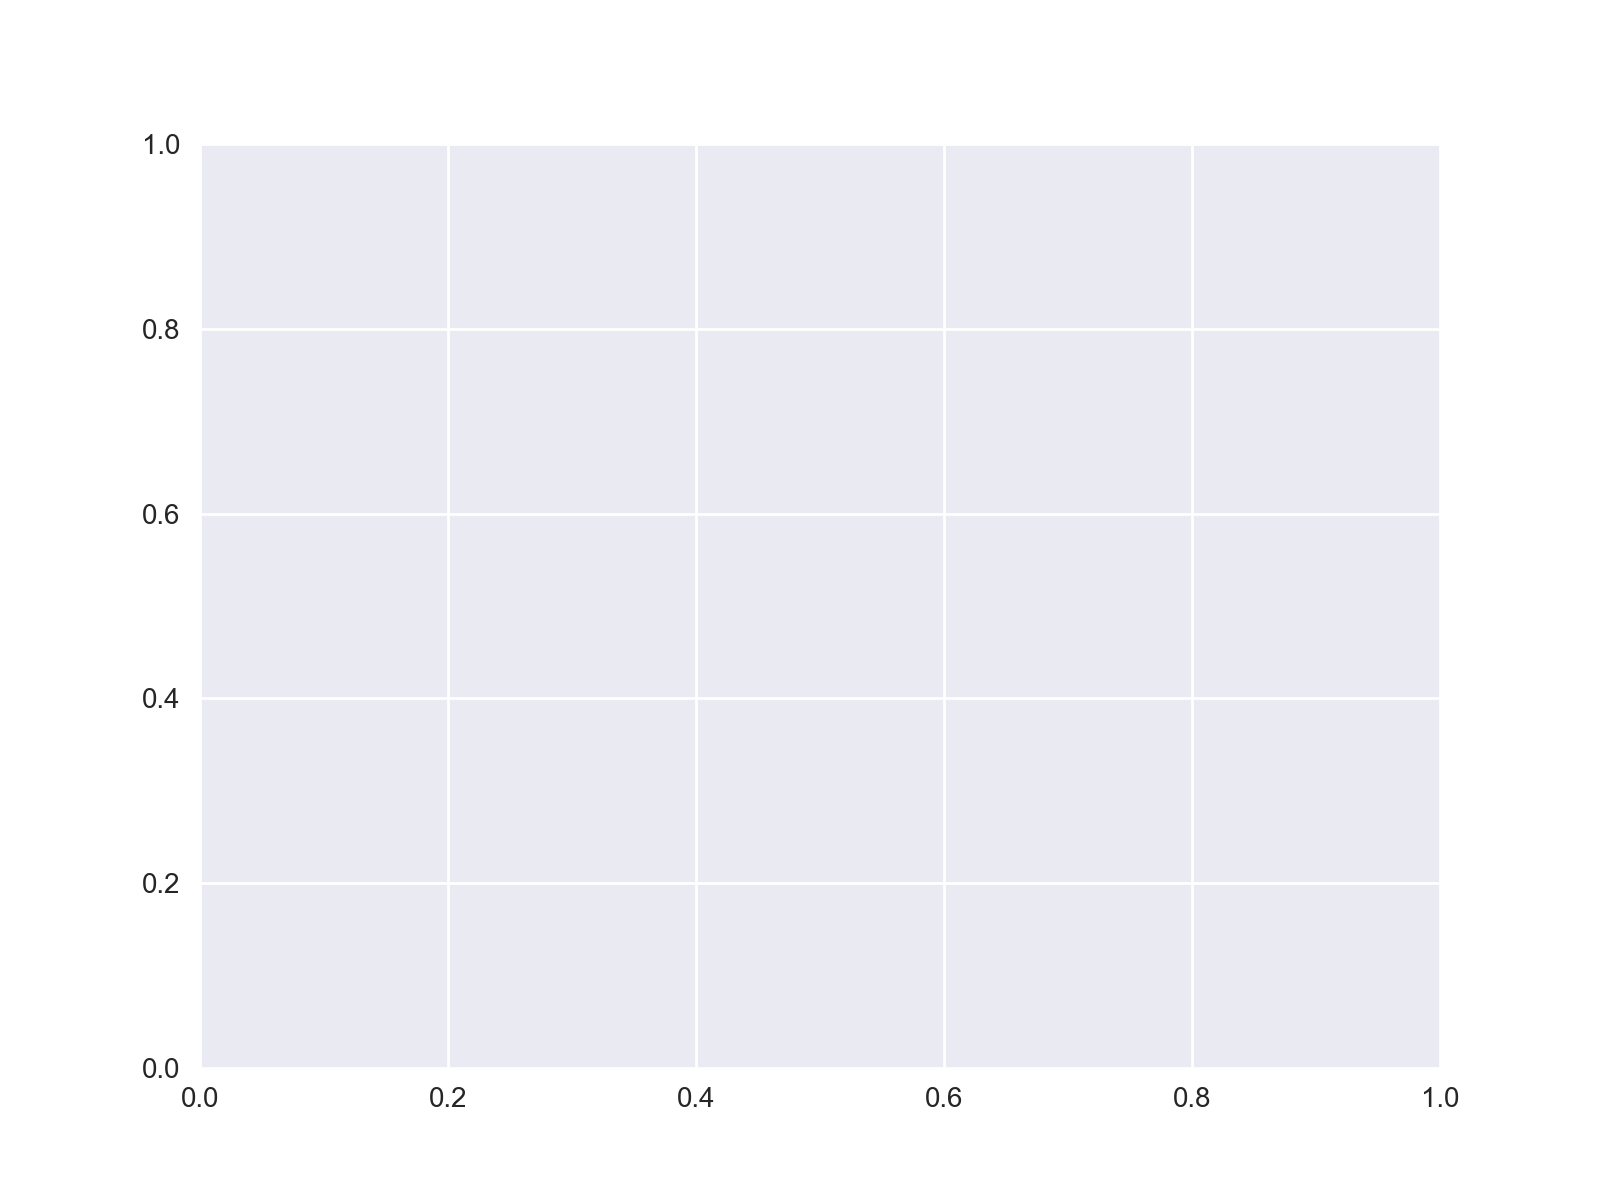

error


In [14]:
try:
    fig, ax = plt.subplots(figsize=(8,6))
    plt_data.groupby(['error']).count()['url_index'].plot(kind='bar', ax=ax)
    plt.tight_layout()
    fig.savefig('./plots/error_dist.png')
except:
    print("error")